In [1]:
from scipy.optimize import root_scalar
import numpy as np, matplotlib.pyplot as plt
import math

import __init__ as CFC

# 12.1

In [2]:
press_coeff_min = -0.41

## 12.1 a)

In [3]:
mach_infin = 0.35

### 12.1 a) i)

In [4]:
def pg_coeff(coeff, mach):
  beta = (1 - mach**2)**0.5
  return coeff / beta

cp_pg = pg_coeff(press_coeff_min, mach_infin)
print(f"P.G. Coefficient: {cp_pg:.5f}")

P.G. Coefficient: -0.43768


### 12.1 a) ii)

In [5]:
def kt_coeff(coeff, mach):
  beta = (1 - mach**2)**0.5
  
  return coeff / (beta + (mach**2 * coeff / (2 * (1 + beta))))

cp_kt = kt_coeff(press_coeff_min, mach_infin)
print(f"K.T. Coefficient: {cp_kt:.5f}")

K.T. Coefficient: -0.44383


## 12.1 b)

In [6]:
def critical_press_coeff(mach, gamma=1.4):
  coeff = 2 / (gamma * mach**2)
  arg = (2 + (gamma - 1) * mach**2) / (gamma + 1)
  
  coeff *= (arg**(gamma / (gamma - 1)) - 1)
  
  return coeff

cp_crit = critical_press_coeff(mach_infin)
print(f"Critical Pressure Coefficient @ M_infin: {cp_crit:.5f}")

Critical Pressure Coefficient @ M_infin: -4.95643


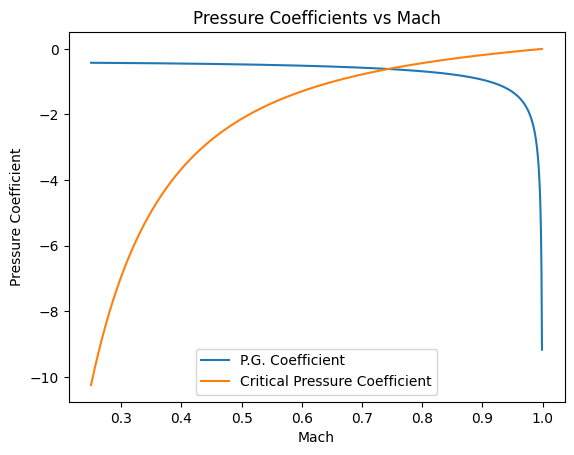

In [7]:
machs = np.linspace(2.5e-1, 1 - 1e-3, 1000)

correcteds = pg_coeff(press_coeff_min, machs)
critical_presses = critical_press_coeff(machs)

plt.plot(machs, correcteds, label="P.G. Coefficient")
plt.plot(machs, critical_presses, label="Critical Pressure Coefficient")
plt.title("Pressure Coefficients vs Mach")
plt.xlabel("Mach")
plt.ylabel("Pressure Coefficient")
plt.legend()
plt.show()

In [8]:
def implicit(mach):
  return critical_press_coeff(mach) - pg_coeff(press_coeff_min, mach)

critical_mach = root_scalar(implicit, bracket=[0.25, 1 - 1e-3]).root
print(f"Critical Mach: {critical_mach:.5f}")

Critical Mach: 0.74363


# 12.2

In [9]:
foil_mach = 2.4
alpha = math.radians(7)
theta = math.radians(10)

def local_press_coeff(mach, relative_angle):
  beta = (mach**2 - 1)**0.5
  
  return 2 * relative_angle / beta

In [10]:
lift_sum = 0
drag_sum = 0

for fore_aft in [1, -1]:
  for upper_lower in [1, -1]:
    # front upper is + theta, back lower is + theta, otherwise - theta
    relative_angle = -alpha + fore_aft * upper_lower * theta
    
    lift_comp = math.cos(relative_angle)
    drag_comp = -math.sin(relative_angle)
    
    local_press_coefficient = local_press_coeff(foil_mach, relative_angle)
    print("Local Pressure Coefficient ({}, {}): {:.5f}".format( "fore" if fore_aft == 1 else "aft",
                                                                "upper" if upper_lower == 1 else "lower",
                                                                local_press_coefficient))
    
    lift_sum += lift_comp * local_press_coefficient * -upper_lower
    drag_sum += drag_comp * local_press_coefficient * fore_aft
    
print(f"Lift: {lift_sum:.5f}")
print(f"Drag: {drag_sum:.5f}")


Local Pressure Coefficient (fore, upper): 0.04800
Local Pressure Coefficient (fore, lower): -0.27199
Local Pressure Coefficient (aft, upper): -0.27199
Local Pressure Coefficient (aft, lower): 0.04800
Lift: 0.00000
Drag: -0.00000


Given the symmetry of the pressure coefficients, the lift and drag forces cancel for this airfoil.

# 12.3

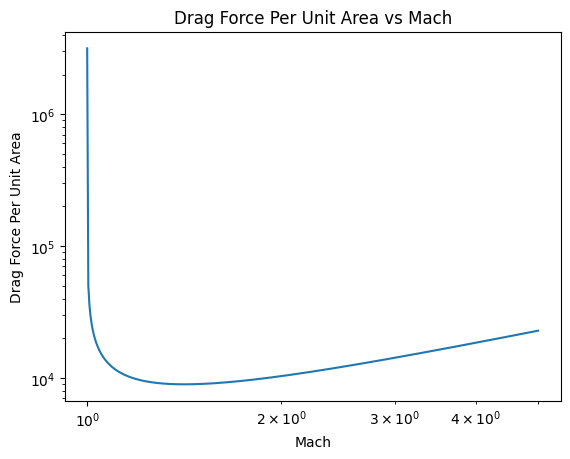

In [11]:
drag_machs = np.linspace(1 + 1e-6, 5, 1000)

def drag_coeff(mach, alpha):
  beta = (mach**2 - 1)**0.5
  return 4 * alpha**2 / beta

rho_inf = 1.293
T_inf = 273.15 + 15

R = 287.05

def drag_per_unit_area(mach, alpha, gamma=1.4):
  T = T_inf
  a = (gamma * R * T)**0.5
  
  return drag_coeff(mach, alpha) * 0.5 * rho_inf * (mach * a)**2

drags = drag_per_unit_area(drag_machs, math.radians(7))

plt.plot(drag_machs, drags)
plt.title("Drag Force Per Unit Area vs Mach")
plt.xlabel("Mach")
plt.ylabel("Drag Force Per Unit Area")
plt.xscale("log")
plt.yscale("log")
plt.show()